PART 1 - Zero-shot image-text similarity scoring using OpenAI CLIP model.

In [1]:
!pip install Pillow requests

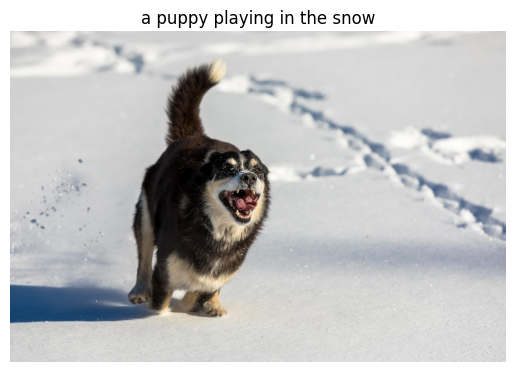

Similarity score: 0.2965


In [3]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
from transformers import CLIPProcessor, CLIPModel

# Load model and processor
model_id = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)

# Download and load image
url = 'https://cdn.pixabay.com/photo/2021/01/17/07/35/dog-5924174_1280.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Define caption
caption = "a puppy playing in the snow"

# Display image with caption
plt.imshow(image)
plt.axis('off')
plt.title(caption)
plt.show()

# Preprocess text
text_inputs = processor(text=[caption], return_tensors="pt", padding=True)
# Preprocess image
image_inputs = processor(images=image, return_tensors="pt")

# Generate embeddings
text_embedding = model.get_text_features(**text_inputs)
image_embedding = model.get_image_features(**image_inputs)

# Normalize embeddings
text_embedding /= text_embedding.norm(dim=-1, keepdim=True)
image_embedding /= image_embedding.norm(dim=-1, keepdim=True)

# Compute cosine similarity
similarity = (text_embedding @ image_embedding.T).item()

# Output similarity score
print(f"Similarity score: {similarity:.4f}")

PART 2 - Example of a SentenceTransformer using a CLIP-like model and Salesforce BLIP2 using a vision-langauge generative model.

May get a messaage about restarting, so will have to restart and continue from this point in the notebook code.

In [1]:
# Install necessary libraries
!pip install -U sentence-transformers
!pip install -U transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
# 1. Import libraries
from sentence_transformers import SentenceTransformer, util
from transformers import AutoProcessor, Blip2ForConditionalGeneration
from urllib.request import urlopen
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt

# 2. Load first model: CLIP-like SentenceTransformer
clip_model = SentenceTransformer('clip-ViT-B-32')

# 3️. Load second model: Salesforce BLIP-2
device = "cuda" if torch.cuda.is_available() else "cpu"
blip_processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
blip_model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16
).to(device)

(882, 2631, 3)


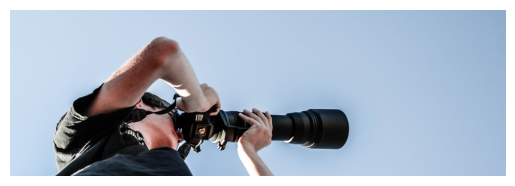

Caption: Her vocalization was remarkably melodic
SentenceTransformer similarity score:
tensor([[0.1901]])

BLIP2 Tokens:
['<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '<image>', '</s>', 'Her', '_vocal', 'ization', '_was', '_remarkably', '_mel', 'odic']


In [4]:
# 4️. Download and load image
link = "https://images.unsplash.com/photo-1524602010760-6eb67b3c63a0?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2631&q=80"
image = Image.open(urlopen(link)).convert("RGB")

# Optional: Check image size
print(np.array(image).shape)

# Display image
plt.imshow(image)
plt.axis('off')
plt.show()

# 5️. SentenceTransformer encoding
caption = "Her vocalization was remarkably melodic"
print(f"Caption: {caption}")

# Encode both image and text
image_embedding = clip_model.encode(image)
text_embedding = clip_model.encode(caption)

# Compute cosine similarity
similarity = util.cos_sim(image_embedding, text_embedding)
print(f"SentenceTransformer similarity score:\n{similarity}\n")

# 6️. BLIP2 processing (tokenizer part). Note that CLIP has no decoder and BLIP-2 does have a decoder.
# So key things to understand is that both tokenize text, both encode images, both fuse vision and language.
# CLIP has no decoder for language and not generative, where BLIP2 has a decoder and is generative

# First process image + text together
blip_inputs = blip_processor(image, text=caption, return_tensors="pt").to(device, torch.float16)

# Get input IDs from tokenizer
token_ids = blip_inputs["input_ids"][0]
tokens = blip_processor.tokenizer.convert_ids_to_tokens(token_ids)

# Clean up tokenizer output
tokens = [token.replace("Ġ", "_") for token in tokens]
print(f"BLIP2 Tokens:\n{tokens}")

PART 3 - BLIP-2 multimodal inference script where BLIP-2 is used to geenrate captions from images. Basic visual question answering (VQA).

Will have to use a hosted runtime with more RAM.

In [1]:
# 1. Install dependencies (only needed if you're running this in Colab)
!pip install transformers --quiet
!pip install ipywidgets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.7 MB/s eta 0:00:00


In [2]:
# 2️. Import all libraries
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# 3️. Load BLIP-2 opt-2.7b model
# ---------------------------------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "Salesforce/blip2-opt-2.7b"

processor = Blip2Processor.from_pretrained(model_id)
model = Blip2ForConditionalGeneration.from_pretrained(
    model_id, torch_dtype=torch.float16 if device == "cuda" else torch.float32
).to(device)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/122k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

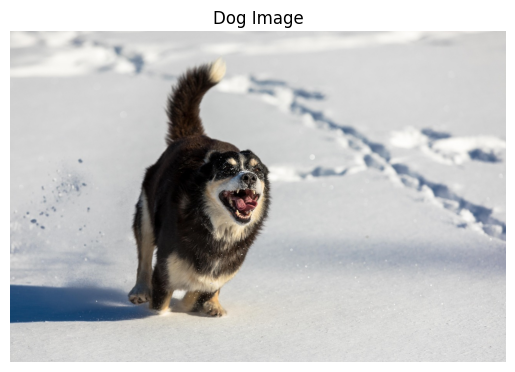

Generated Caption: a man is standing in front of a snow covered mountain


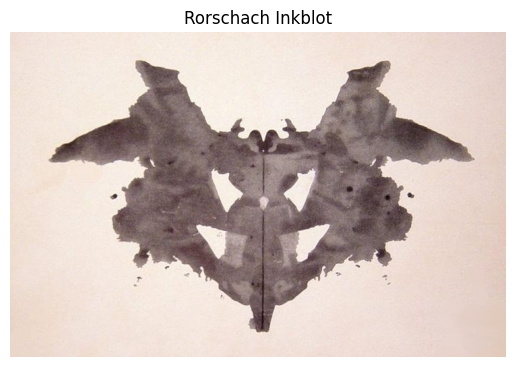

Generated Caption: a drawing of a horse with a black and white pattern
VQA Answer: Question: Write down what you see in this picture. Answer: a person with a hat


In [3]:
# 4️. Helper function to process inputs properly
def prepare_inputs(image, text=None):
    if text:
        inputs = processor(image, text=text, return_tensors="pt")
    else:
        inputs = processor(image, return_tensors="pt")

    # Proper device + dtype handling
    for k, v in inputs.items():
        if k == "pixel_values":
            inputs[k] = v.to(device, dtype=torch.float16 if device == "cuda" else torch.float32)
        else:
            inputs[k] = v.to(device)
    return inputs

# 5️. Captioning function
def generate_caption(image, max_tokens=30):
    inputs = prepare_inputs(image)
    generated_ids = model.generate(**inputs, max_new_tokens=max_tokens)
    caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
    return caption

# 6️. VQA function
def visual_question_answering(image, question, max_tokens=50):
    prompt = f"Question: {question} Answer:"
    inputs = prepare_inputs(image, text=prompt)
    generated_ids = model.generate(**inputs, max_new_tokens=max_tokens)
    answer = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
    return answer

# 7️. Test image #1: Dog in snow — Captioning
url = 'https://cdn.pixabay.com/photo/2021/01/17/07/35/dog-5924174_1280.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert("RGB")

plt.imshow(image)
plt.axis('off')
plt.title("Dog Image")
plt.show()

caption = generate_caption(image)
print(f"Generated Caption: {caption}")

# 8️. Test image #2: Rorschach Inkblot — Captioning + VQA
url = "https://upload.wikimedia.org/wikipedia/commons/7/70/Rorschach_blot_01.jpg"
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert("RGB")

plt.imshow(image)
plt.axis('off')
plt.title("Rorschach Inkblot")
plt.show()

# Captioning
caption = generate_caption(image)
print(f"Generated Caption: {caption}")

# Visual Question Answering
question = "Write down what you see in this picture."
answer = visual_question_answering(image, question)
print(f"VQA Answer: {answer}")